# Erowid dataset - Data Analysis

In this notebook we will analyse the erowid dataset, in order to discover the distribution of drugs

In [1]:
from processor import ErowidJSONProcessor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_processor = ErowidJSONProcessor('../data/experiences_db')
data_processor.get_tags()

100%|██████████| 39237/39237 [00:02<00:00, 13815.43it/s]


## Tags Analysis

The tags int this problem include both some of the categories we want to classify (e.g. glowing experiences, bad trips), as well some of the categories we can use as input to the model (e.g. alone, small groups, park). We can also infer useful information from the tags.

In [3]:
tags = []
for tag in data_processor.tags.values():
    tags.append(tag.to_dict())
    
tags_df = pd.DataFrame(tags)
tags_df = tags_df.set_index('tag_id')

In [11]:
tags_df.sort_values(by=['exp_appearances'],ascending=False)

,name,exp_appearances,perc_exp_appearances,perc_usages,average_impact
tag_id,,,,,
1,General,15235,0.194141,"[0.3333333333333333, 0.5, 0.3333333333333333, ...",0.350579
17,Small Group (2-9),12168,0.155058,"[0.2, 0.5, 0.3333333333333333, 0.2, 0.5, 0.333...",0.351423
16,Alone,10892,0.138798,"[0.3333333333333333, 0.5, 0.25, 0.333333333333...",0.365696
2,First Times,10482,0.133573,"[0.3333333333333333, 0.3333333333333333, 0.333...",0.325960
3,Combinations,8208,0.104595,"[0.3333333333333333, 0.3333333333333333, 0.5, ...",0.324054
11,Retrospective / Summary,6068,0.077325,"[0.25, 0.5, 0.5, 0.3333333333333333, 0.25, 0.2...",0.314110
5,Difficult Experiences,5571,0.070992,"[0.3333333333333333, 0.14285714285714285, 0.5,...",0.290372
4,Glowing Experiences,5314,0.067717,"[0.3333333333333333, 0.3333333333333333, 0.2, ...",0.287233
28,Various,5116,0.065194,"[0.5, 0.5, 0.2, 0.16666666666666666, 0.3333333...",0.335984


We have now a dataframe with all of the tags, how many times (and percentage) they appear across all of the experiences, and the average of how many other tags are used along with each one. (e.g. General is usually 1 in about 3 tags for the experience). We can already see some difficultly interpretable labels, such as General, Various, Not Applicable.

In [5]:
len(tags)

53

In [7]:
tags_co_appearances_df = data_processor.get_tags_co_appearances_matrix()

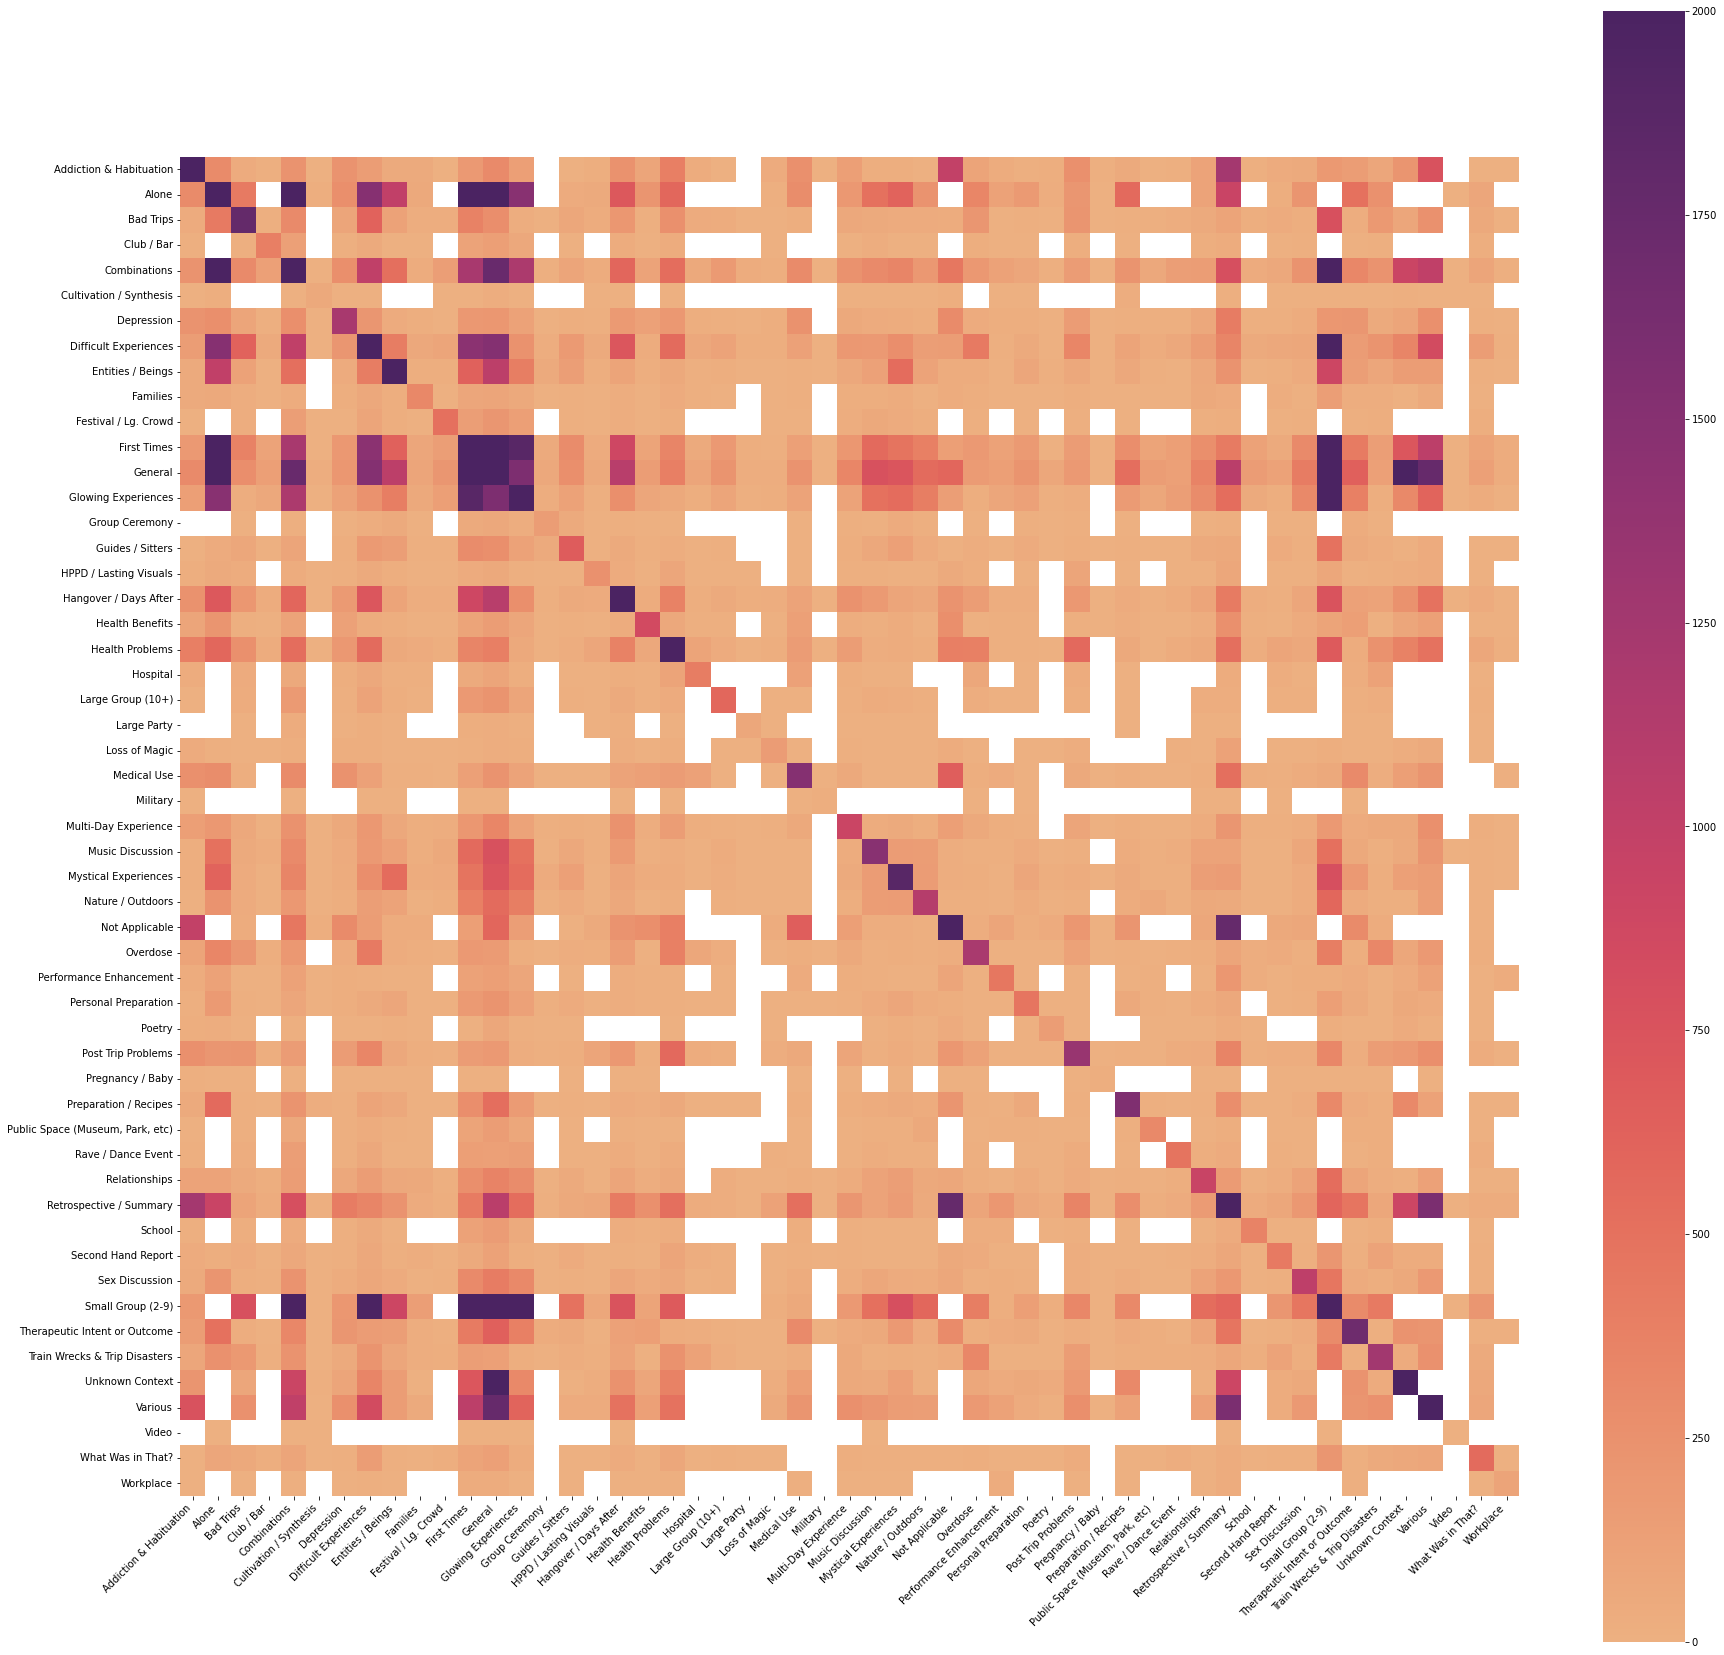

In [10]:
plt.figure(figsize=(30, 30))
ax = sns.heatmap(
    tags_co_appearances_df, 
    vmin=0, vmax=2000,
    cmap="flare",
    square=True,
#     annot=True,
    robust=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);